## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure reproducibility
tf.random.set_seed(42)
np.random.seed(42)

## Download and Extract Dataset

In [2]:
# Downloaded and manually extracted dataset from https://data.caltech.edu/records/mzrjq-6wc02

data_dir = r"C:\Users\vaish\OneDrive\UH\Machine Learning\caltech-101\caltech-101\101_ObjectCategories\101_ObjectCategories"

import os

# List directories inside the dataset
classes = os.listdir(data_dir)
print(f"Classes in the dataset: {classes}")

# Check the number of files in each class directory
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        print(f"Class {class_name}: {len(os.listdir(class_path))} images")

Classes in the dataset: ['accordion', 'airplanes', 'anchor', 'ant', 'BACKGROUND_Google', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'Faces', 'Faces_easy', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'Leopards', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'Motorbikes', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', '

## Preprocess Dataset to Split Train and Validation

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the path for the dataset
dataset_dir = "C:/Users/vaish/OneDrive/UH/Machine Learning/caltech-101/caltech-101/101_ObjectCategories/101_ObjectCategories"

# Set directories for the split data
train_dir = "C:/Users/vaish/OneDrive/UH/Machine Learning/caltech-101/caltech-101/train"
val_dir = "C:/Users/vaish/OneDrive/UH/Machine Learning/caltech-101/caltech-101/val"

# Create directories for training and validation datasets
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(val_dir):
    os.makedirs(val_dir)

# Loop through each class folder and split the data
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        # Get all images in the class folder
        images = os.listdir(class_path)
        
        # Split into train and validation sets (80% train, 20% validation)
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
        
        # Create class-specific directories in train and val
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        
        if not os.path.exists(train_class_dir):
            os.makedirs(train_class_dir)
        if not os.path.exists(val_class_dir):
            os.makedirs(val_class_dir)
        
        # Move the files to respective directories
        for img in train_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
        
        for img in val_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_class_dir, img))

print("Data split completed!")

Data split completed!


## Preprocess Dataset Images

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
img_size = (150, 150)  # Resize images to 150x150
batch_size = 32

# Define training and validation data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directory for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 7280 images belonging to 102 classes.
Found 1864 images belonging to 102 classes.


## Build CNN Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting

# Fully connected layer 2 (Output layer)
model.add(Dense(102, activation='softmax'))  # 102 classes for classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

## Train the Model

In [6]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10, 
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/10
227/227 [==============================] - 186s 819ms/step - loss: 4.0741 - accuracy: 0.1529 - val_loss: 3.4729 - val_accuracy: 0.2543
Epoch 2/10
227/227 [==============================] - 166s 733ms/step - loss: 3.5636 - accuracy: 0.2496 - val_loss: 3.2206 - val_accuracy: 0.3314
Epoch 3/10
227/227 [==============================] - 167s 733ms/step - loss: 3.3249 - accuracy: 0.2899 - val_loss: 3.0674 - val_accuracy: 0.3669
Epoch 4/10
227/227 [==============================] - 161s 710ms/step - loss: 3.1534 - accuracy: 0.3161 - val_loss: 2.7739 - val_accuracy: 0.3966
Epoch 5/10
227/227 [==============================] - 159s 700ms/step - loss: 3.0281 - accuracy: 0.3342 - val_loss: 2.7078 - val_accuracy: 0.3971
Epoch 6/10
227/227 [==============================] - 157s 690ms/step - loss: 2.8930 - accuracy: 0.3517 - val_loss: 2.6169 - val_accuracy: 0.4208
Epoch 7/10
227/227 [==============================] - 152s 671ms/step - loss: 2.7879 - accuracy: 0.3634 - val_loss: 2.4662 -

## Plot Training and Validation Performance

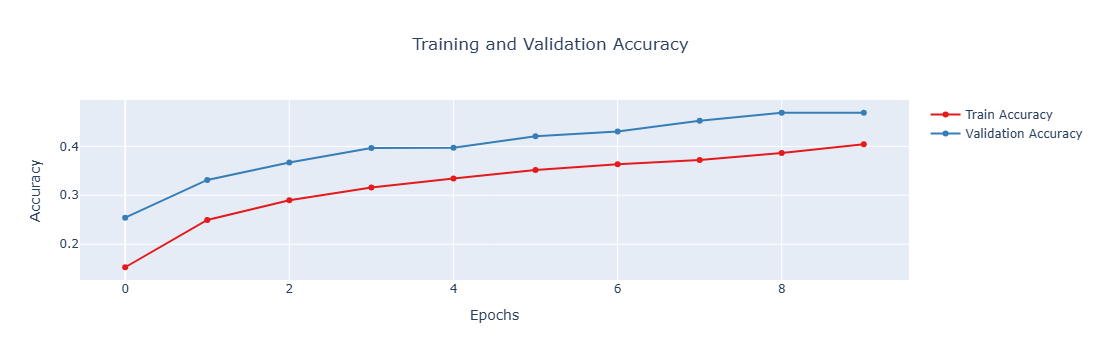

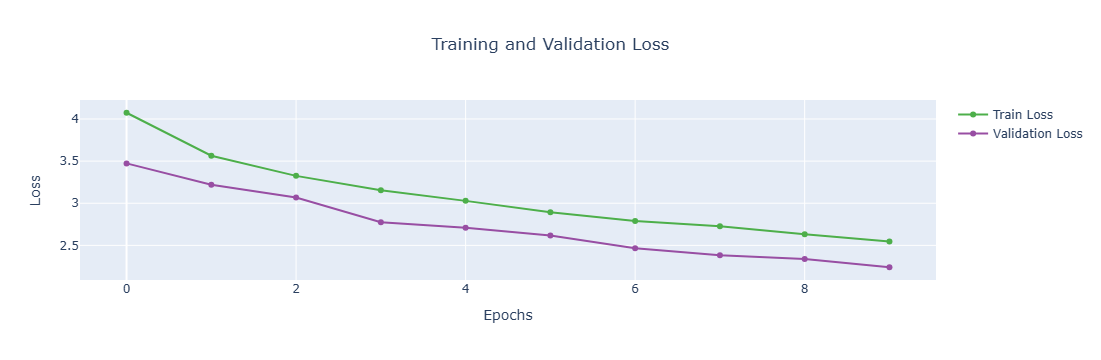

In [68]:
import plotly.graph_objects as go
import plotly.express as px

# Defining a color-blind-friendly color palette
colors = px.colors.qualitative.Set1  

# Create 2D plot for Training and Validation Accuracy
fig1 = go.Figure()

# Add training accuracy trace
fig1.add_trace(go.Scatter(
    x=list(range(len(history.history['accuracy']))),
    y=history.history['accuracy'],
    mode='lines+markers',
    name='Train Accuracy',
    line=dict(color=colors[0], width=2),
    marker=dict(size=6)
))

# Add validation accuracy trace
fig1.add_trace(go.Scatter(
    x=list(range(len(history.history['val_accuracy']))),
    y=history.history['val_accuracy'],
    mode='lines+markers',
    name='Validation Accuracy',
    line=dict(color=colors[1], width=2),
    marker=dict(size=6)
))

# Set titles and axis labels
fig1.update_layout(
    title="Training and Validation Accuracy",
    title_x=0.5,
    title_xanchor='center',
    xaxis_title='Epochs',
    yaxis_title='Accuracy',
    showlegend=True
)

# Create 2D plot for Training and Validation Loss
fig2 = go.Figure()

# Add training loss trace
fig2.add_trace(go.Scatter(
    x=list(range(len(history.history['loss']))),
    y=history.history['loss'],
    mode='lines+markers',
    name='Train Loss',
    line=dict(color=colors[2], width=2),
    marker=dict(size=6)
))

# Add validation loss trace
fig2.add_trace(go.Scatter(
    x=list(range(len(history.history['val_loss']))),
    y=history.history['val_loss'],
    mode='lines+markers',
    name='Validation Loss',
    line=dict(color=colors[3], width=2),
    marker=dict(size=6)
))

# Set titles and axis labels
fig2.update_layout(
    title="Training and Validation Loss",
    title_x=0.5,
    title_xanchor='center',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    showlegend=True
)

# Show both plots
fig1.show()
fig2.show()

## Evaluate Model

In [11]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

59/59 [==============================] - 13s 218ms/step - loss: 2.2424 - accuracy: 0.4678
Validation Loss: 2.242354154586792
Validation Accuracy: 0.4678111672401428


## Prediction Process

In [13]:
import tqdm  # Import tqdm for progress bar

# Initialize empty lists to hold the true labels and predicted labels
val_labels = []
val_preds = []

# Total number of batches to process
total_batches = len(val_generator)  # Number of batches in the validation generator

# Iterate through the validation data in batches with a progress bar
for i, batch in enumerate(tqdm.tqdm(val_generator, total=total_batches, desc="Processing batches")):
    images, labels = batch  # Get the image batch and corresponding labels
    predictions = model.predict(images)  # Predict the batch
    
    # Store the true and predicted labels (flatten to 1D)
    val_labels.extend(np.argmax(labels, axis=1))  
    val_preds.extend(np.argmax(predictions, axis=1))
    
    # Stop after 10 batches for testing purposes 
    if i >= 10:  
        break

# Convert lists to numpy arrays
val_labels = np.array(val_labels)
val_preds = np.array(val_preds)

# Check if the number of labels and predictions match
print(f"Number of true labels: {len(val_labels)}")
print(f"Number of predicted labels: {len(val_preds)}")

Processing batches:   0%|                                                                       | 0/59 [00:00<?, ?it/s]

1/1 [==============================] - 0s 223ms/step


Processing batches:   2%|█                                                              | 1/59 [00:00<00:20,  2.87it/s]

1/1 [==============================] - 0s 178ms/step


Processing batches:   3%|██▏                                                            | 2/59 [00:00<00:17,  3.30it/s]

1/1 [==============================] - 0s 166ms/step


Processing batches:   5%|███▏                                                           | 3/59 [00:00<00:16,  3.39it/s]

1/1 [==============================] - 0s 116ms/step


Processing batches:   7%|████▎                                                          | 4/59 [00:01<00:14,  3.85it/s]

1/1 [==============================] - 0s 105ms/step


Processing batches:   8%|█████▎                                                         | 5/59 [00:01<00:12,  4.25it/s]

1/1 [==============================] - 0s 107ms/step


Processing batches:  10%|██████▍                                                        | 6/59 [00:01<00:11,  4.49it/s]

1/1 [==============================] - 0s 105ms/step


Processing batches:  12%|███████▍                                                       | 7/59 [00:01<00:11,  4.70it/s]

1/1 [==============================] - 0s 106ms/step


Processing batches:  14%|████████▌                                                      | 8/59 [00:01<00:10,  4.77it/s]

1/1 [==============================] - 0s 120ms/step


Processing batches:  15%|█████████▌                                                     | 9/59 [00:02<00:10,  4.76it/s]

1/1 [==============================] - 0s 142ms/step


Processing batches:  17%|██████████▌                                                   | 10/59 [00:02<00:10,  4.48it/s]

1/1 [==============================] - 0s 208ms/step


Processing batches:  17%|██████████▌                                                   | 10/59 [00:02<00:13,  3.67it/s]

Number of true labels: 352
Number of predicted labels: 352


## Confusion Matrix and Classification Report

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(val_labels, val_preds)
print("Confusion Matrix:\n", cm)

# Classification Report
# Pass the correct number of target names
# Ensure the labels correspond to the actual number of unique classes in the validation set.
cr = classification_report(val_labels, val_preds, target_names=list(val_generator.class_indices.keys())[:89], zero_division=1)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[10  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 1  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  2]]
Classification Report:
                    precision    recall  f1-score   support

BACKGROUND_Google       0.12      0.77      0.20        13
            Faces       0.79      1.00      0.88        11
       Faces_easy       0.90      1.00      0.95        19
         Leopards       0.10      1.00      0.18         3
       Motorbikes       0.90      0.90      0.90        29
        accordion       1.00      0.00      0.00         4
        airplanes       0.73      1.00      0.85        33
           anchor       1.00      0.00      0.00         2
              ant       1.00      0.00      0.00         1
           barrel       1.00      0.00      0.00         3
             bass       1.00      0.00      0.00         1
           beaver       0.25      0.71      0.37         7
        binocular       0.50     

## Confusion Matrix Visualization

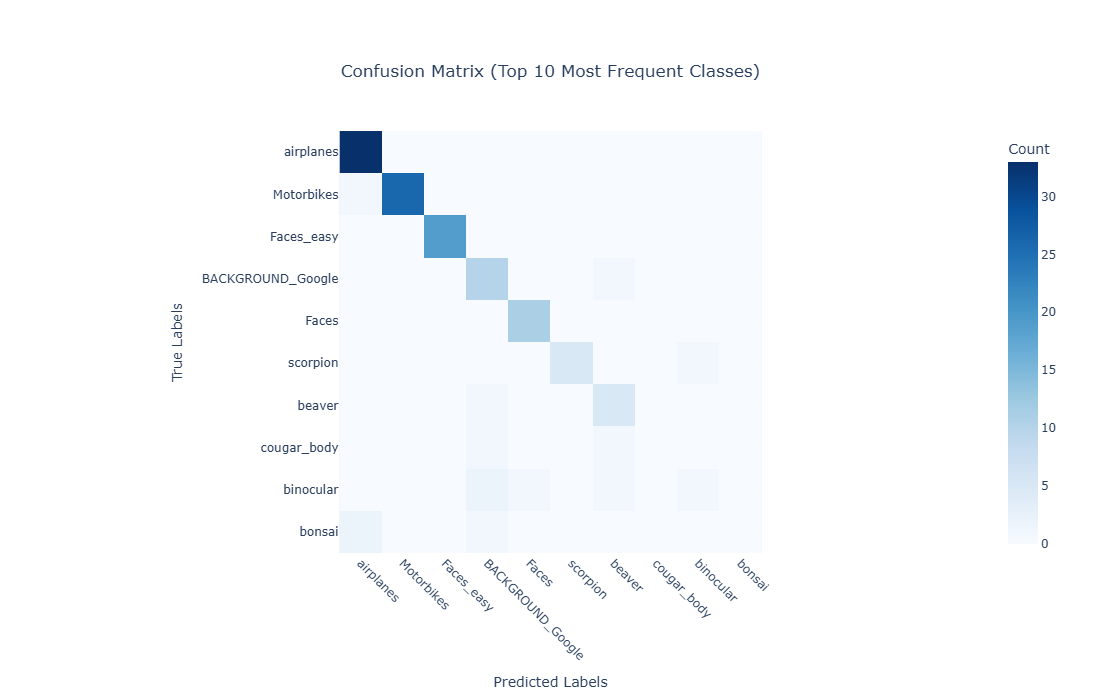

In [67]:
import pandas as pd
import plotly.express as px

# Get the actual labels used by the model for both training and validation
class_labels = list(val_generator.class_indices.keys())

# If cm dimensions do not match the number of class labels (89 classes in cm vs 102 labels in dataset)
# Use the labels that are part of the confusion matrix (non-zero rows and columns)
valid_classes = [i for i in range(len(cm)) if cm[i].sum() > 0]  # classes with non-zero predictions

# Convert confusion matrix to a DataFrame
cm_df = pd.DataFrame(cm[valid_classes, :][:, valid_classes], index=[class_labels[i] for i in valid_classes], columns=[class_labels[i] for i in valid_classes])

# Choose the top 10 most frequent classes (highest row sums)
top_classes = cm_df.sum(axis=1).nlargest(10).index
cm_df_simplified = cm_df.loc[top_classes, top_classes]

# Create an interactive heatmap using Plotly
fig = px.imshow(cm_df_simplified,
                labels={'x': 'Predicted Labels', 'y': 'True Labels'},
                x=top_classes,
                y=top_classes,
                color_continuous_scale='Blues',
                title="Confusion Matrix (Top 10 Most Frequent Classes)")

# Adjust layout for better spacing and readability
fig.update_xaxes(tickangle=45, tickmode='array', tickvals=top_classes)
fig.update_yaxes(tickangle=0, tickmode='array', tickvals=top_classes)
fig.update_layout(
    width=900,  # Adjust width to make space for labels
    height=700,  # Adjust height for better space distribution
    title={'x': 0.5, 'xanchor': 'center', 'y': 0.89, 'yanchor': 'bottom'},  # Adjust title position
    margin=dict(t=130, b=120, l=120, r=120),  # Adjust top margin for title space
    coloraxis_colorbar_title='Count', 
    font=dict(size=12), 
)

# Show the plot
fig.show()